<a href="https://colab.research.google.com/github/Elifmuslu/Music_Genaration_with_LSTM/blob/main/Duman_%C5%9Eark%C4%B1_S%C3%B6z%C3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import csv
from bs4 import BeautifulSoup, NavigableString, Tag
from google.colab import files
import pandas as pd

In [ ]:
# Sanatşı sayfasındaki verilerin alınması
sayfa = requests.get('https://sarki.alternatifim.com/sarkici/duman')
soup = BeautifulSoup(sayfa.text, 'html.parser')

# şarkıların bulunduğu div'in seçilmesi
sarkilar = soup.find(class_='sarkisozu')

# div etiketinin içindeki <a> taglarının seçilmesi
sarki_adlari = sarkilar.find_all('a')
print(sarki_adlari)

[<a href="/sarkici/duman/ah">Ah</a>, <a href="/sarkici/duman/akibet">Akıbet</a>, <a href="/sarkici/duman/al-beni-yar">Al beni yar</a>, <a href="/sarkici/duman/aman-aman">Aman Aman</a>, <a href="/sarkici/duman/bal">Bal</a>, <a href="/sarkici/duman/balik">Balık</a>, <a href="/sarkici/duman/bebek">Bebek</a>, <a href="/sarkici/duman/belki-alisman-lazim">Belki Alışman Lazım</a>, <a href="/sarkici/duman/bu-aksam">Bu Akşam</a>, <a href="/sarkici/duman/bu-ask-beni-yorar">Bu Aşk Beni Yorar</a>, <a href="/sarkici/duman/cile-bulbulum">Çile Bülbülüm</a>, <a href="/sarkici/duman/daglar-baglar">Dağlar Bağlar</a>, <a href="/sarkici/duman/deli">Deli</a>, <a href="/sarkici/duman/dibine-kadar">Dibine Kadar</a>, <a href="/sarkici/duman/don-ne-olur">Dön Ne Olur</a>, <a href="/sarkici/duman/donek">Dönek</a>, <a href="/sarkici/duman/elimde-ki-saz-yeter-canima">Elimde Ki Saz Yeter Canıma</a>, <a href="/sarkici/duman/elimdeki-saz">Elimdeki  Saz</a>, <a href="/sarkici/duman/ellerin-ellerime">Ellerin Ellerime</

In [ ]:
# sarki sözlerinin yazılacağı dosyanın oluşturulması ve başlık satırının eklenmesi
f = csv.writer(open('Duman.csv', 'w', newline='', encoding='utf-8-sig'))
f.writerow(['Sanatçı Adı','Şarkı Id','Şarkı Adı', 'Şarkı Sözü','Satır No'])
sarki_id=1 # her bir şarkıya ait id

# her bir şarkı için dön
for sarki in sarki_adlari:
    sarki_adi = sarki.contents[0]
    print(sarki_adi)
    sarki_link = "https://sarki.alternatifim.com"+sarki.get('href')
    sarki_sayfasi = requests.get(sarki_link)
    soup = BeautifulSoup(sarki_sayfasi.text, 'html.parser') # sözlerin bulunduğu sayfayı parse et
    
    sarki_sozu = soup.findAll(class_='sarkisozu') # sadece sözlerin bulunduğu div'i seç
    satir_no=1
    
    # her bir şarkı sözü için dön
    for sarki_satirlar in sarki_sozu:
        for br in sarki_satirlar.findAll('br'): # sözleri satır satır kaydedeceğimiz için her bir <br> tagından böl
            sarki_satir=br.previous_sibling # birinci satıra geri git
            
            # <br> taglarını sil ve sözleri satır satı kaydet
            if not (sarki_satir and isinstance(sarki_satir,NavigableString)):
                continue
            sarki_satir_2 = sarki_satir.nextSibling
            
            if sarki_satir_2 and isinstance(sarki_satir_2,Tag) and sarki_satir_2.name == 'br':
                soz = str(sarki_satir).strip()
                if soz:
                    f.writerow(['Duman',sarki_id,str(sarki_adi).strip(), soz,satir_no]) 
                    satir_no=satir_no+1
    sarki_id=sarki_id+1;

Ah
Akıbet
Al beni yar
Aman Aman
Bal
Balık
Bebek
Belki Alışman Lazım
Bu Akşam
Bu Aşk Beni Yorar
Çile Bülbülüm
Dağlar Bağlar
Deli
Dibine Kadar
Dön Ne Olur
Dönek
Elimde Ki Saz Yeter Canıma
Elimdeki  Saz
Ellerin Ellerime
En Güzel Günüm Gecem
Eski Köprünün Altında
Eyvallah
Geçmiş Olsun
Gönül
Gönül İster
[ reklamı gizle / hide ads ]
Gözleri Kanlı
Gurbet
Haberin Yok Ölüyorum
Halimiz Duman
Hatun
Hayatı Yaşa
Hayvan
Helal Olsun
Her Şeyi Yak
Herşeyi Yak
İçerim Ben Bu Akşam
İstanbul
İyi De Bana Ne
Karanlıkta
Kırmış Kalbini
Kıyamet
Kim Neden Öldü (ft. ceza)
Kolay Değildir
Köpekler
Köprüaltı
Kumbela
Manası Yok
Masal
Melankoli
Melek
«
‹
›
»


In [ ]:
files.download('Duman.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Duman.csv to Duman.csv
User uploaded file "Duman.csv" with length 41121 bytes


In [ ]:
dataset = pd.read_csv('Duman.csv', encoding = "utf_8")
dataset.head()

,Sanatçı Adı,Şarkı Id,Şarkı Adı,Şarkı Sözü,Satır No
0,Duman,1,Ah,Yarışmadı,1
1,Duman,1,Ah,Yenilmedi,2
2,Duman,1,Ah,Açık seçik sizle oynamadı,3
3,Duman,1,Ah,Gerilmedi,4
4,Duman,1,Ah,Sanılmasın yine basmış onu bulantılar,5


In [ ]:
import requests
import csv
from bs4 import BeautifulSoup, NavigableString, Tag
from google.colab import files
import pandas as pd

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.utils as ku 
import numpy as np 
import os

In [ ]:
def processFirstLine(lyrics, songID, songName, row):
    lyrics.append(row['Şarkı Sözü'] + '\n')
    songID.append(row['Şarkı Id'])
    songName.append(row['Şarkı Adı'])
    return lyrics,songID,songName
  
# Boş listeleri tanımlayalım (lyrics , songID , songName) 
lyrics = []
songID = []
songName = []

# songNumber verisetindeki şarkının sırasını belirtir.
songNumber = 1
# i veisetindeki şarkı sözünün sırasını belirtir.
i = 0
isFirstLine = True
# Her bir satırdaki verileri sırası ile birleştirelim.
for index,row in dataset.iterrows():
    if(songNumber == row['Şarkı Id']):
        if (isFirstLine):
            lyrics,songID,songName = processFirstLine(lyrics,songID,songName,row)
            isFirstLine = False
        else :
            # Eğer aynı şarkıdaysak birleştirmeye devam edelim  
            lyrics[i] +=  row['Şarkı Sözü'] + '\n'
    # Aynı şarkı için söz birleştirme işlemi bittiyse bir sonrarki şarkıya geç:   
    else :
        lyrics,songID,songName = processFirstLine(lyrics,songID,songName,row)
        songNumber = row['Şarkı Id']
        i+=1

In [ ]:
# Sözleri .txt dosyasına kaydedelim
with open('dumanlyrics.txt', 'w',encoding="utf-8") as filehandle:  
    for listitem in lyrics:
        filehandle.write('%s\n' % listitem)

In [ ]:
# yeni verisetini yükle ve tüm karakterleri küçük harfe dönüştür :
textFileName = '/content/dumanlyrics.txt'
raw_text = open(textFileName, encoding = 'UTF-8').read()
raw_text = raw_text.lower()

In [ ]:
# her harfi int türünde dönüştürelim
chars = sorted(list(set(raw_text)))
int_chars = dict((i, c) for i, c in enumerate(chars))
chars_int = dict((i, c) for c, i in enumerate(chars))

In [ ]:

n_chars = len(raw_text)
n_vocab = len(chars)
print('Toplam karakter sayısı :'  , n_chars) # number of all the characters in lyricsText.txt dosyasındaki tüm harf sayısı
print('Unique karakter sayısı : ', n_vocab) # farklı harakter sayısı

Toplam karakter sayısı : 19758
Unique karakter sayısı :  55


In [ ]:
# verisetinin işlenmesi:
seq_len = 32
data_X = []
data_y = []
for i in range(0, n_chars - seq_len, 1):
    # Input Sequeance(Input olarak kullanılacak)
    seq_in  = raw_text[i:i+seq_len]
    # Output sequence (Target olarak kullanılacak)
    seq_out = raw_text[i + seq_len]
    # Input verisini data_X olarak saklayalım
    data_X.append([chars_int[char] for char in seq_in])
    # Target verilerini data_y olarak saklayalım
    data_y.append(chars_int[seq_out])
n_patterns = len(data_X)
print( 'Eğitim setindeki toplam veri sayısı : ', n_patterns)

Eğitim setindeki toplam veri sayısı :  19726


In [ ]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['Duman.csv']))
dataset.head()

,Sanatçı Adı,Şarkı Id,Şarkı Adı,Şarkı Sözü,Satır No
0,Duman,1,Ah,Yarışmadı,1
1,Duman,1,Ah,Yenilmedi,2
2,Duman,1,Ah,Açık seçik sizle oynamadı,3
3,Duman,1,Ah,Gerilmedi,4
4,Duman,1,Ah,Sanılmasın yine basmış onu bulantılar,5


In [ ]:
tokenizer = Tokenizer()
# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
#     -O /tmp/sonnets.txt
data = open('/content/dumanlyrics.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(64, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 89, 100)           131500    
_________________________________________________________________
bidirectional (Bidirectional (None, 89, 128)           84480     
_________________________________________________________________
dropout (Dropout)            (None, 89, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dense (Dense)                (None, 657)               66357     
_________________________________________________________________
dense_1 (Dense)              (None, 1315)              865270    
Total params: 1,239,207
Trainable params: 1,239,207
Non-trainable params: 0
______________________________________________

In [ ]:
history = model.fit(predictors, label, epochs=150, verbose=1)


Epoch 1/150
70/70 [==============================] - 19s 275ms/step - loss: 3.6470 - accuracy: 0.2206
Epoch 2/150
70/70 [==============================] - 13s 183ms/step - loss: 3.5570 - accuracy: 0.2416
Epoch 3/150
70/70 [==============================] - 13s 183ms/step - loss: 3.4895 - accuracy: 0.2546
Epoch 4/150
70/70 [==============================] - 13s 184ms/step - loss: 3.4196 - accuracy: 0.2653
Epoch 5/150
70/70 [==============================] - 13s 184ms/step - loss: 3.3202 - accuracy: 0.2734
Epoch 6/150
70/70 [==============================] - 13s 184ms/step - loss: 3.2400 - accuracy: 0.2837
Epoch 7/150
70/70 [==============================] - 13s 183ms/step - loss: 3.1653 - accuracy: 0.3051
Epoch 8/150
70/70 [==============================] - 13s 184ms/step - loss: 3.1784 - accuracy: 0.3047
Epoch 9/150
70/70 [==============================] - 13s 183ms/step - loss: 3.0569 - accuracy: 0.3351
Epoch 10/150
70/70 [==============================] - 13s 183ms/step - loss: 2.971

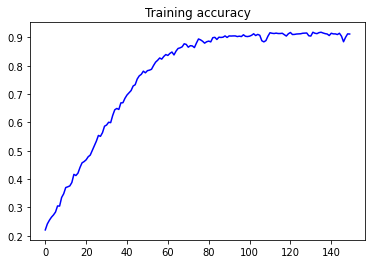

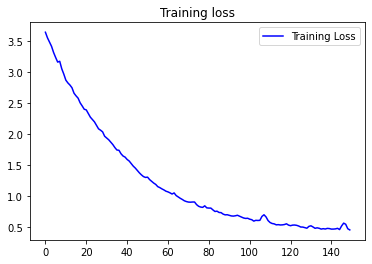

In [ ]:

import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "elif"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

print('\nBitti')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


elif dedik hâlâ sana deli dediler gönülden sözü okumadılar donar içim arkada sazım sorarsın cobana sakin yanlis yola basinda ki cobana sakin kanma '' '' ' kan degil '' aksin sonunda ucuz olan hayata deger ver çek bekle '' yok deger asker ezer devriye niye ister kahve yetime gelen zulüm ezer devriye niye ister kahve yetime gelen zulüm iskence var sene 1789 kuduz domuz hirsiz fransiz ihtilali üzdüler zenci kardesleri p cler kene misali emdiler hain köpeklere yönetmelige kisilige saldiri bunu sonu yolu toprak mi hayir evet arada''fol yok yumurta yahudiler firinda yana gurbetteki kardesler hesap etler peace dumanyakstyler kopar cezaaa

Bitti
